# 二十.图像量化处理和采样处理及局部马赛克特效

一.图像量化处理

图像通常是自然界景物的客观反映，并以照片形式或视频记录的介质连续保存，获取图像的目标是从感知的数据中产生数字图像，因此需要把连续的图像数据离散化，转换为数字化图像，其工作主要包括两方面——量化和采样。数字化幅度值称为量化，数字化坐标值称为采样。本章主要讲解图像量化和采样处理的概念，并通过Python和OpenCV实现这些功能。


一.图像量化处理

图像通常是自然界景物的客观反映，并以照片形式或视频记录的介质连续保存，获取图像的目标是从感知的数据中产生数字图像，因此需要把连续的图像数据离散化，转换为数字化图像，其工作主要包括两方面——量化和采样。数字化幅度值称为量化，数字化坐标值称为采样。本章主要讲解图像量化和采样处理的概念，并通过Python和OpenCV实现这些功能。


### 20.1.1.概述

所谓量化（Quantization），就是将图像像素点对应亮度的连续变化区间转换为单个特定值的过程，即将原始灰度图像的空间坐标幅度值离散化。量化等级越多，图像层次越丰富，灰度分辨率越高，图像的质量也越好；量化等级越少，图像层次欠丰富，灰度分辨率越低，会出现图像轮廓分层的现象，降低了图像的质量。图6-1是将图像的连续灰度值转换为0至255的灰度级的过程。


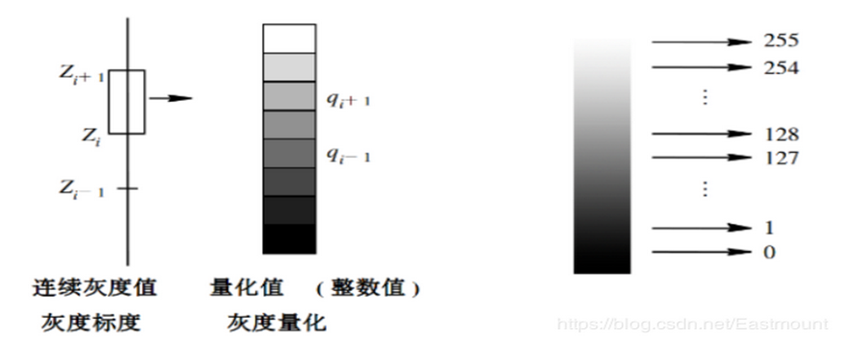

如果量化等级为2，则将使用两种灰度级表示原始图片的像素（0-255），灰度值小于128的取0，大于等于128的取128；如果量化等级为4，则将使用四种灰度级表示原始图片的像素，新图像将分层为四种颜色，0-64区间取0，64-128区间取64，128-192区间取128，192-255区间取192；依次类推。图6-2是对比不同量化等级的“Lena”图。其中（a）的量化等级为256，（b）的量化等级为64，（c）的量化等级为16，（d）的量化等级为8，（e）的量化等级为4，（f）的量化等级为2。


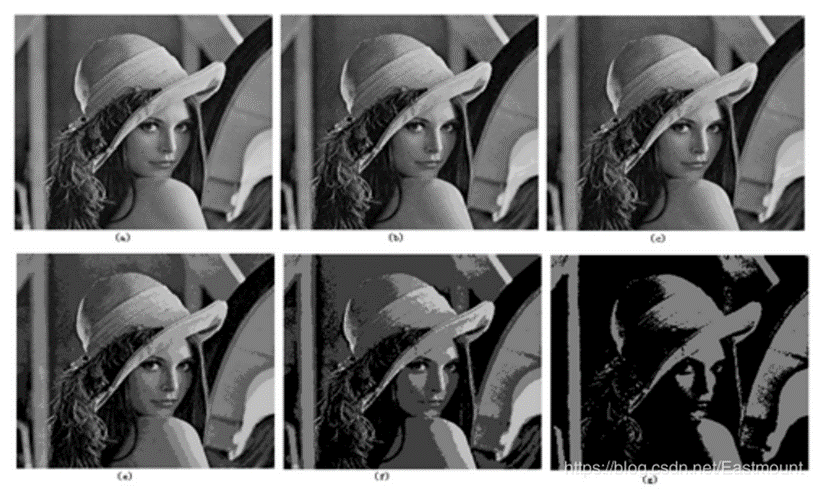

### 20.1.2.操作

下面讲述Python图像量化处理相关代码操作。其核心流程是建立一张临时图片，接着循环遍历原始图像中所有像素点，判断每个像素点应该属于的量化等级，最后将临时图像显示。下述代码将灰度图像转换为两种量化等级。


In [1]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#获取图像高度和宽度
height = img.shape[0]
width = img.shape[1]

#创建一幅图像
new_img = np.zeros((height, width, 3), np.uint8)

#图像量化操作 量化等级为2
for i in range(height):
    for j in range(width):
        for k in range(3): #对应BGR三分量
            if img[i, j][k] < 128:
                gray = 0
            else:
                gray = 128
            new_img[i, j][k] = np.uint8(gray)
        
#显示图像
cv2.imshow("src", img)
cv2.imshow("", new_img)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


其输出结果如图所示，它将灰度图像划分为两种量化等级。


下面的代码分别比较了量化等级为2、4、8的量化处理效果

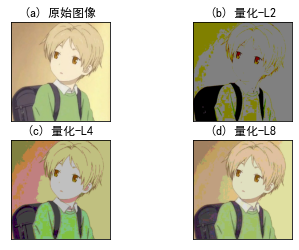

In [1]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#获取图像高度和宽度
height = img.shape[0]
width = img.shape[1]

#创建一幅图像
new_img1 = np.zeros((height, width, 3), np.uint8)
new_img2 = np.zeros((height, width, 3), np.uint8)
new_img3 = np.zeros((height, width, 3), np.uint8)

#图像量化等级为2的量化处理
for i in range(height):
    for j in range(width):
        for k in range(3): #对应BGR三分量
            if img[i, j][k] < 128:
                gray = 0
            else:
                gray = 128
            new_img1[i, j][k] = np.uint8(gray)

#图像量化等级为4的量化处理
for i in range(height):
    for j in range(width):
        for k in range(3): #对应BGR三分量
            if img[i, j][k] < 64:
                gray = 0
            elif img[i, j][k] < 128:
                gray = 64
            elif img[i, j][k] < 192:
                gray = 128
            else:
                gray = 192
            new_img2[i, j][k] = np.uint8(gray)

#图像量化等级为8的量化处理
for i in range(height):
    for j in range(width):
        for k in range(3): #对应BGR三分量
            if img[i, j][k] < 32:
                gray = 0
            elif img[i, j][k] < 64:
                gray = 32
            elif img[i, j][k] < 96:
                gray = 64
            elif img[i, j][k] < 128:
                gray = 96
            elif img[i, j][k] < 160:
                gray = 128
            elif img[i, j][k] < 192:
                gray = 160
            elif img[i, j][k] < 224:
                gray = 192
            else:
                gray = 224
            new_img3[i, j][k] = np.uint8(gray)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'(a) 原始图像', u'(b) 量化-L2', u'(c) 量化-L4', u'(d) 量化-L8']  
images = [img, new_img1, new_img2, new_img3]  
for i in range(4):  
   plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()


输出结果如图所示，该代码调用
matplotlib.pyplot库绘制了四幅图像，
其中（a）表示原始图像，（b）表示
等级为2的量化处理，（c）表示等级
为4的量化处理，（d）表示等级为8
的量化处理。


### 20.1.3.K-Means聚类量化处理

上一小节的量化处理是通过遍历图像中的所有像素点，进行灰度图像的幅度值离散化处理。本小节补充一个基于K-Means聚类算法的量化处理过程，它能够将彩色图像RGB像素点进行颜色分割和颜色量化。更多知识推荐大家学习上一节。


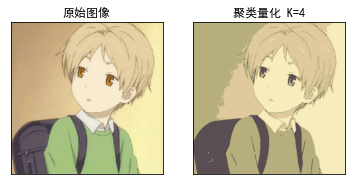

In [5]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg') 

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成4类
compactness, labels, centers = cv2.kmeans(data, 4, None, criteria, 10, flags)


#图像转换回uint8二维类型
centers = np.uint8(centers)
res = centers[labels.flatten()]
dst = res.reshape((img.shape))

#图像转换为RGB显示
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)


#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图像
titles = [u'原始图像', u'聚类量化 K=4']  
images = [img, dst]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray'), 
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()



输出结果如图所示，它通过K-Means聚类算法将彩色人物图像的灰度聚集成四种颜色。


## 20.2.图像采样处理

图像采样（Image Sampling）处理是将一幅连续图像在空间上分割成M×N个网格，每个网格用一个亮度值或灰度值来表示，其示意图如图所示。


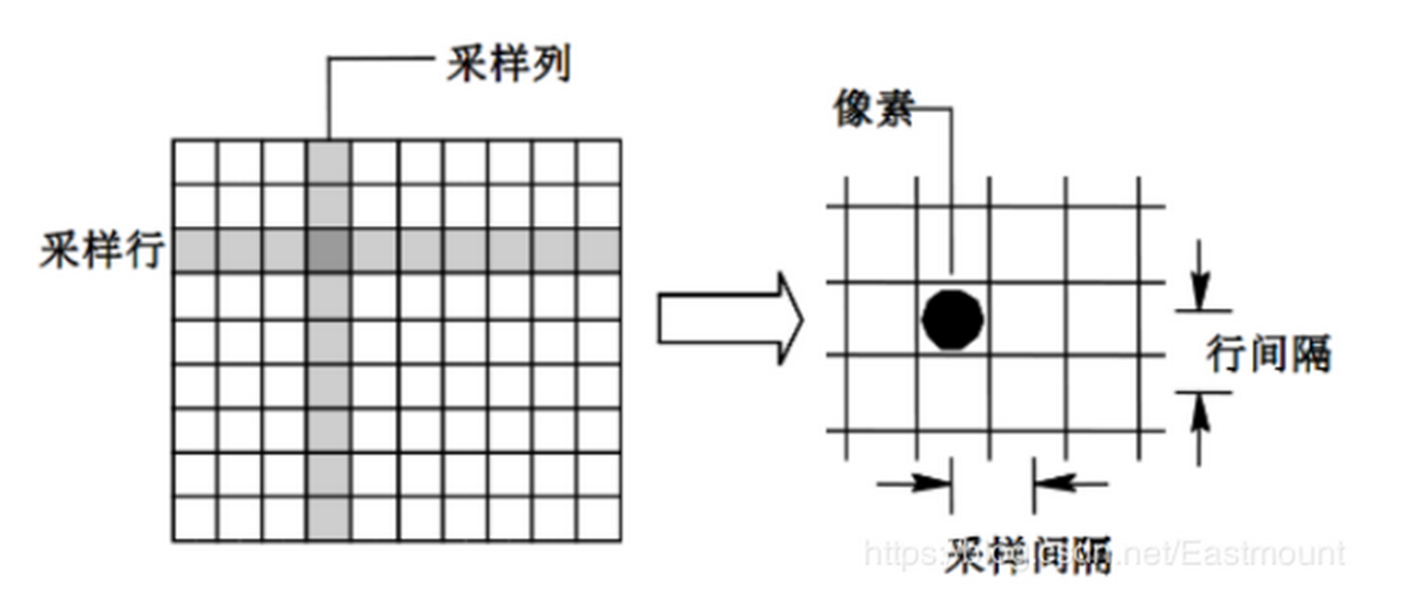

### 20.2.1.概述

图像采样的间隔越大，所得图像像素数越少，空间分辨率越低，图像质量越差，甚至出现马赛克效应；相反，图像采样的间隔越小，所得图像像素数越多，空间分辨率越高，图像质量越好，但数据量会相应的增大。下图展示了不同采样间隔的“Lena”图。


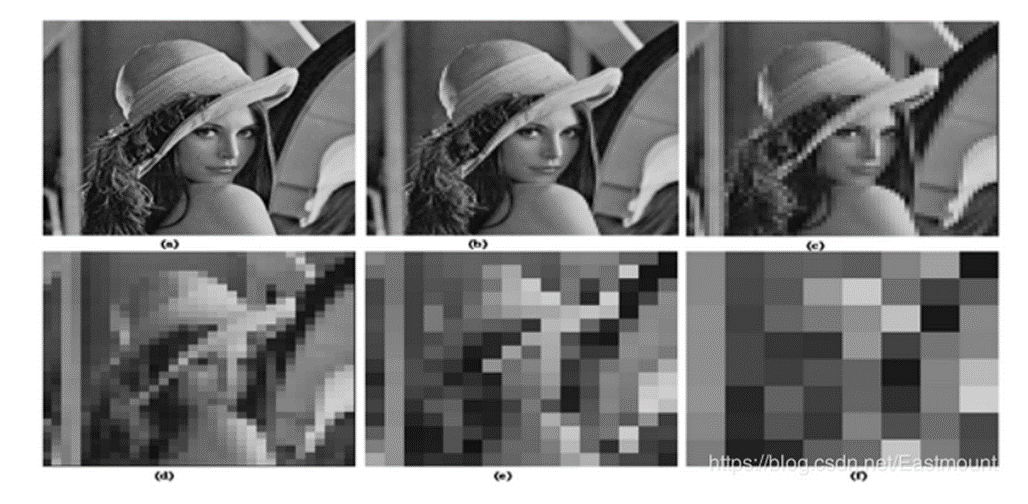

### 20.2.2.操作

下面讲述Python图像采样处理相关代码操作。其核心流程是建立一张临时图片，设置需要采样的区域大小（如16×16），接着循环遍历原始图像中所有像素点，采样区域内的像素点赋值相同（如左上角像素点的灰度值），最终实现图像采样处理。代码是进行16×16采样的过程。



In [ ]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#获取图像高度和宽度
height = img.shape[0]
width = img.shape[1]

#采样转换成16*16区域
numHeight = height // 16
numwidth = width // 16

#创建一幅图像
new_img = np.zeros((height, width, 3), np.uint8)

#图像循环采样16*16区域
for i in range(16):
    #获取Y坐标
    y = i*numHeight
    for j in range(16):
        #获取X坐标
        x = j*numwidth
        #获取填充颜色 左上角像素点
        b = img[y, x][0]
        g = img[y, x][1]
        r = img[y, x][2]
        
        #循环设置小区域采样
        for n in range(numHeight):
            for m in range(numwidth):
                new_img[y+n, x+m][0] = np.uint8(b)
                new_img[y+n, x+m][1] = np.uint8(g)
                new_img[y+n, x+m][2] = np.uint8(r)
        
#显示图像
cv2.imshow("src", img)
cv2.imshow("", new_img)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()



同样，可以对彩色图像进行采样处理，下面的代码将彩色风景图像采样处理成8×8的马赛克区域。


In [ ]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#获取图像高度和宽度
height = img.shape[0]
width = img.shape[1]

#采样转换成8*8区域
numHeight = height//8
numwidth = width//8

#创建一幅图像
new_img = np.zeros((height, width, 3), np.uint8)

#图像循环采样8*8区域
for i in range(8):
    #获取Y坐标
    y = i*numHeight
    for j in range(8):
        #获取X坐标
        x = j*numwidth
        #获取填充颜色 左上角像素点
        b = img[y, x][0]
        g = img[y, x][1]
        r = img[y, x][2]
        
        #循环设置小区域采样
        for n in range(numHeight):
            for m in range(numwidth):
                new_img[y+n, x+m][0] = np.uint8(b)
                new_img[y+n, x+m][1] = np.uint8(g)
                new_img[y+n, x+m][2] = np.uint8(r)
        
#显示图像
cv2.imshow("src", img)
cv2.imshow("Sampling", new_img)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()



## 20.2.3.局部马赛克处理

前面讲述的代码是对整幅图像进行采样处理，那么如何对图像的局部区域进行马赛克处理呢？下面的代码就实现了该功能。当鼠标按下时，它能够给鼠标拖动的区域打上马赛克，并按下“s”键保存图像至本地。


In [10]:
# -- coding:utf-8 --
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
im = cv2.imread('test.jpg')

#设置鼠标左键开启
en = False

#鼠标事件
def draw(event, x, y, flags, param):
    global en
    #鼠标左键按下开启en值
    if event==cv2.EVENT_LBUTTONDOWN:
        en = True
    #鼠标左键按下并且移动
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_LBUTTONDOWN:
        #调用函数打马赛克
        if en:
            drawMask(y,x)
        #鼠标左键弹起结束操作
        elif event==cv2.EVENT_LBUTTONUP:
            en = False        
# 图像局部采样操作         
def drawMask(x, y, size=10):
    #size*size采样处理
    m = x // size * size  
    n = y // size * size
    print(m, n)
    #10*10区域设置为同一像素值
    for i in range(size):
        for j in range(size):
            im[m+i][n+j] = im[m][n]

#打开对话框
cv2.namedWindow('image')

#调用draw函数设置鼠标操作
cv2.setMouseCallback('image', draw)

#循环处理
while(1):
    cv2.imshow('image', im)
    #按ESC键退出
    if cv2.waitKey(10)&0xFF==27:
        break
    #按s键保存图片
    elif cv2.waitKey(10)&0xFF==115:
        cv2.imwrite('sava.png', im)

#退出窗口
cv2.destroyAllWindows()



120 170
120 170
130 180
130 180
140 190
140 190
150 200
150 200
150 200
150 200
160 200
160 200
160 210
170 210
170 210
180 220
180 220
180 220
180 220
180 220
180 220
180 230
180 230
180 230
180 240
180 240
180 240
180 240
190 240
190 240
180 250
180 250
180 250
170 250
170 250
160 250
160 250
150 250
150 250
140 250
140 250
130 240
130 240
130 240
120 230
110 220
110 210
110 210
110 210
110 200
110 200
110 200
110 200
110 200
110 200
110 190
110 190
120 190
120 190
120 190
120 190
120 190
120 190
130 190
130 180
130 180
120 180
120 180
120 180
120 180
120 180
120 180
130 180
130 180
130 170
130 170
130 170
130 170
140 170
140 170
140 170
140 170
150 170
150 170
150 180
160 180
160 180
170 190
170 190
170 190
170 200
180 210
180 210
180 220
180 240
180 240
180 250
180 260
180 260
180 260
180 260
180 260
180 260
180 260
180 260
170 260
170 270
170 270
170 270
170 270
160 270
160 270
160 270
160 260
160 260
150 260
150 260
150 260
150 260
150 260
150 250
150 250
150 250
150 250
160 250


80 370
90 360
90 360
90 350
100 330
100 330
110 320
110 320
110 310
110 310
110 310
110 310
110 310
100 310
100 320
100 320
90 330
90 330
90 350
90 350
80 360
80 360
70 370
70 370
70 370
70 370
80 370
80 370
80 360
80 360
80 340
90 320
90 320
90 300
90 290
90 290
90 290
90 290
80 290
70 300
60 320
50 340
50 370
50 380
50 380
40 380
50 380
50 380
50 360
50 360
60 340
60 330
70 300
70 300
80 260
80 260
80 260
80 230
80 230
80 210
80 210
80 210
80 200
80 200
70 210
60 230
60 230
60 250
60 250
50 270
40 300
40 300
40 330
40 350
40 350
40 360
40 350
40 350
50 320
50 280
50 270
60 230
60 200
60 180
60 170
60 170
60 170
60 190
60 190
60 220
60 220
50 260
50 260
40 310
40 310
40 350
40 350
30 370
30 380
30 380
30 390
30 380
40 370
40 360
40 320
40 320
50 270
50 270
50 220
50 220
60 180
60 180
60 160
60 150
60 150
60 150
50 170
50 170
50 170
50 200
50 210
50 250
40 260
40 300
40 330
40 330
40 340
30 350
30 360
30 350
40 340
40 340
50 320
50 290
50 290
60 240
70 190
70 160
70 160
70 140
70 130
7

IndexError: index 400 is out of bounds for axis 0 with size 400

230 400


IndexError: index 400 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 420


IndexError: index 420 is out of bounds for axis 0 with size 400

230 420


IndexError: index 420 is out of bounds for axis 0 with size 400

230 420


IndexError: index 420 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 410


IndexError: index 410 is out of bounds for axis 0 with size 400

230 400


IndexError: index 400 is out of bounds for axis 0 with size 400

230 390
230 390
230 390
230 370
230 370
230 370
230 360
230 330
230 330
230 330
240 290
240 280
240 280
240 280
240 250
240 240
240 240
250 220
250 220
250 210
250 200
250 200
250 190
250 180
250 180
260 180
260 180
260 170
260 160
260 160
270 150
270 140
270 140
280 130
280 130
280 130
280 140
280 150
280 150
290 170
290 180
290 200
290 200
290 230
290 240
290 260
290 270
290 290
290 300
290 310
280 310
290 310
290 300
290 290
290 280
300 260
300 250
300 250
300 230
300 230
310 210
310 190
310 190
310 180
310 180
310 180
310 180
300 190
300 190
300 200
290 210
290 210
280 240
280 240
280 240
280 240
280 270
280 270
270 290
270 290
270 300
270 300
270 300
280 300
280 300
280 300
280 290
290 260
290 260
290 260
290 230
290 230
290 200
290 200
300 180
300 180
300 170
290 180
290 180
290 190
280 210
280 250
280 250
280 280
280 310
280 320
280 330
290 330
290 320
290 320
300 300
300 300
310 270
310 270
310 230
310 230
320 230
320 200
320 200
330 170
330 170
330 160
330 160
330 170
330 170


IndexError: index 400 is out of bounds for axis 0 with size 400

380 390
380 390
380 390
380 370
380 370
380 370
380 340
380 330
380 330
380 330
380 280
380 270
380 210
380 200
380 200
380 140
380 140
380 100
380 100
380 90
380 90
380 90
380 90
380 100
380 110
370 140
370 140
370 140
370 180
360 220
360 230
360 270
350 300
340 320
340 320
340 330
340 330
340 320
330 290
330 260
330 250
330 250
330 200
330 150
330 150
330 140
330 120
330 110
330 110
330 110
330 110
330 110
330 120
330 120
330 120
320 140
320 140
320 180
320 180
320 180
320 230
320 230
320 280
320 280
320 290
320 320
320 320
320 340
320 340
320 330
320 330
320 310
320 310
330 270
330 270
340 220
340 220
340 170
340 170
340 170
340 140
340 140
340 140
350 120
350 120
350 130
350 130
340 140
340 160
340 170
340 170
340 200
340 200
330 240
330 250
330 290
330 320
330 320
330 320
330 320
330 320
340 300
340 300
340 300
340 300
340 270
340 270
340 260
340 220
340 220
340 220
340 210
340 180
340 170
330 140
330 130
330 130
330 120
330 120
330 120
330 120
330 130
320 150
320 170
320 170
310 